# Generate Conceptual Space

In [ ]:
from src.conceptual_space import *
from src.paper_formalization import *
from src.transformational_creativity import *

SEED_PAPER_URL = 'https://arxiv.org/pdf/2412.05169.pdf'
SEED_PAPER_NAME = 'Towards Understanding the Role of Sharpness-Aware Minimization for Out-of-Distribution Generalization'

# Formalize the seed paper to extract claims, axioms, and logic reconstruction
axioms, output_pdf, logic_reconsturction, english_reconstruction = formalize_file(SEED_PAPER_URL)


/Users/samuelschapiro/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/samuelschapiro/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/samuelschapiro/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trai

In [7]:
# Load the final_data.json file and visualize the conceptual space
json_file = 'outputs/final_data.json'
with open(json_file, 'r') as f:
    final_data = json.load(f)   

Type: <class 'openai.types.chat.chat_completion_message.ChatCompletionMessage'>
ChatCompletionMessage(content='```json\n{\n    "nodes": [\n        {"id": "n1", "label": "Sharpness-Aware Minimization (SAM)", "description": "An optimization algorithm aimed at improving generalization, especially for out-of-distribution (OOD) generalization.", "type": "rule"},\n        {"id": "n2", "label": "Out-of-Distribution (OOD) Generalization", "description": "Generalization capability of a model to data from a different distribution than the one used during training.", "type": "rule"},\n        {"id": "n3", "label": "Sharpness of Parameters", "description": "Measure of how much the loss increases when parameters are perturbed in the worst possible direction.", "type": "axiom"},\n        {"id": "n4", "label": "ρ-Robust Empirical Loss", "description": "Maximum loss obtained by perturbing parameters with ℓ2-norm bounded by ρ.", "type": "axiom"},\n        {"id": "n5", "label": "Zero-Shot OOD Generaliza

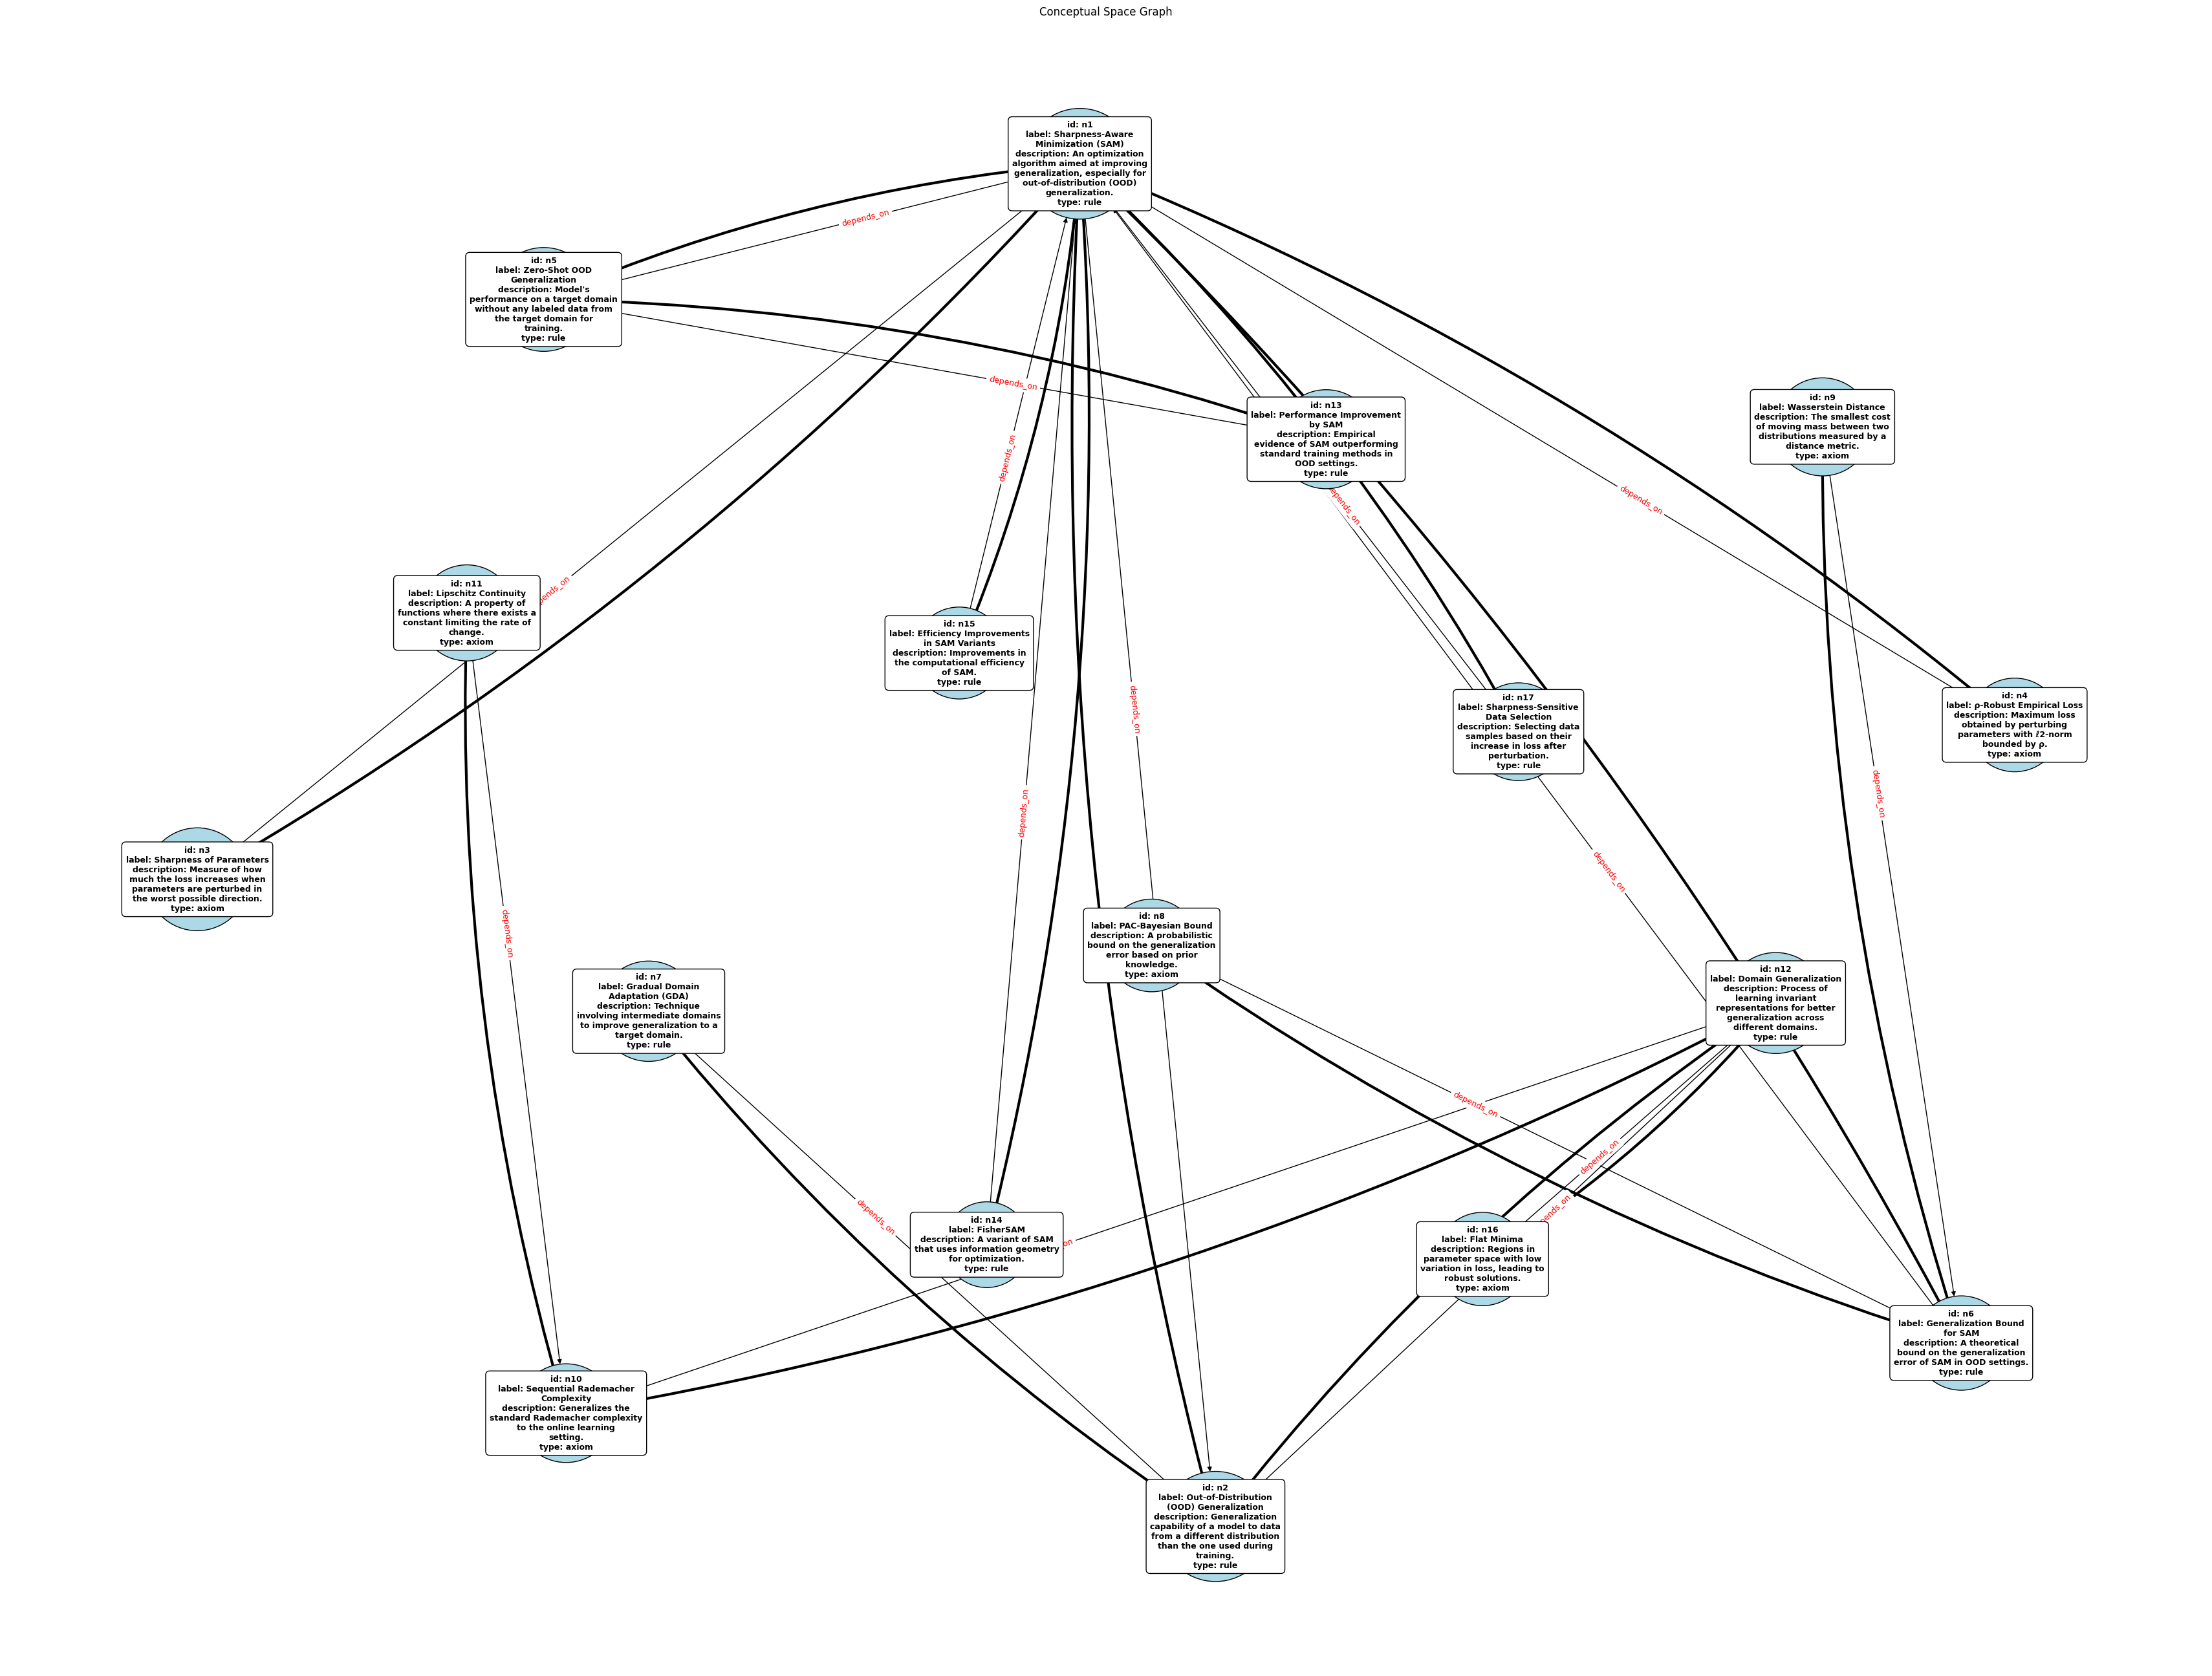

In [8]:
# Obtain english formalized claims from the seed paper json
english_claims = ''
for i in range(len(final_data['axioms'])):
    english_claims += final_data['axioms'][i]['english'] + '\n'

concept_space = get_conceptual_space_from_paper(SEED_PAPER_NAME, english_claims)
visualize_conceptual_space(concept_space)

# TODO: recursively search through literature to build a comprehensive conceptual space
# Embed the description of each axiom and then compare it with literature embeddings to find related works

In [11]:
from collections import defaultdict, Counter

# Obtain all axioms and all rules separately
axioms_list = [node for node in concept_space['nodes'] if node.get('type') == 'axiom']
rules_list = [node for node in concept_space['nodes'] if node.get('type') == 'rule']


# Count incoming edges for each axiom

# Map node ids to node objects for quick lookup
node_id_to_axiom = {node['id']: node for node in axioms_list}

# Count incoming edges for each axiom node
incoming_counts = Counter()
for edge in concept_space['edges']:
    target_id = edge.get('source')
    if target_id in node_id_to_axiom:
        incoming_counts[target_id] += 1
# Sort axioms by number of incoming edges (descending)
sorted_axioms = sorted(
    axioms_list,
    key=lambda ax: incoming_counts.get(ax['id'], 0),
    reverse=True
)

# Build a mapping from target node id to list of source node ids (for outgoing edges)
target_to_sources = defaultdict(list)
for edge in concept_space['edges']:
    if edge['relation'] == 'depends_on':
        target_to_sources[edge['target']].append(edge['source'])

# Print top 3 axioms and their incoming nodes
axioms = []
for ax in sorted_axioms:
    count = incoming_counts.get(ax['id'], 0)
    axioms.append(f"{ax['label']} ({count} incoming): {ax['description']}")
    print(f"{ax['label']} ({count} incoming): {ax['description']}")


Sharpness of Parameters (1 incoming): Measure of how much the loss increases when parameters are perturbed in the worst possible direction.
ρ-Robust Empirical Loss (1 incoming): Maximum loss obtained by perturbing parameters with ℓ2-norm bounded by ρ.
PAC-Bayesian Bound (1 incoming): A probabilistic bound on the generalization error based on prior knowledge.
Wasserstein Distance (1 incoming): The smallest cost of moving mass between two distributions measured by a distance metric.
Sequential Rademacher Complexity (1 incoming): Generalizes the standard Rademacher complexity to the online learning setting.
Lipschitz Continuity (1 incoming): A property of functions where there exists a constant limiting the rate of change.
Flat Minima (1 incoming): Regions in parameter space with low variation in loss, leading to robust solutions.


In [14]:
propose_transformational_idea(concept_space, axioms)

NameError: name 'propose_transformational_idea' is not defined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Embed the description of the axiom with the most number of dependents
axiom_desc = max_incoming_axiom['description']
inputs = tokenizer(axiom_desc, return_tensors='pt', truncation=True, max_length=512)
with torch.no_grad():
    axiom_embedding = model.roberta(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()

# Assume literature_embeddings is a list of (paper_id, embedding) tuples loaded elsewhere
# Compute cosine similarity between axiom_embedding and each literature embedding

# Example: literature_embeddings = [(paper_id, embedding), ...]
# Replace this with your actual literature embeddings loading code
# literature_embeddings = ...

# Calculate similarities
similarities = []
for paper_id, emb in literature_embeddings:
    sim = cosine_similarity([axiom_embedding], [emb])[0][0]
    similarities.append((paper_id, sim))

# Sort by similarity and get top related works
top_related = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]
top_related
